# Midterm Project

Dataset from kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Data cleaning and preparation

- Downloading the dataset
- Doing the train/validation/test split

In [2]:
df = pd.read_csv(r"C:\Users\pc\Downloads\archive (10)\heart.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.describe().round()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,149.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,1.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Display the first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
duplicates = df[df.duplicated()]


In [9]:
print(duplicates)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2

There are 723 duplicate rows in this dataset, and we will drop them so our prediction will not be biased or overfitted.

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(302, 14)

In [12]:
print(df.columns)
print()
print(df.dtypes)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


## EDA

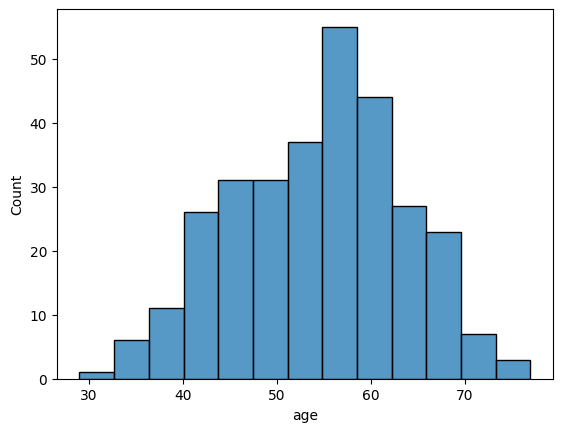

In [13]:


sns.histplot(df['age'] )
plt.show()

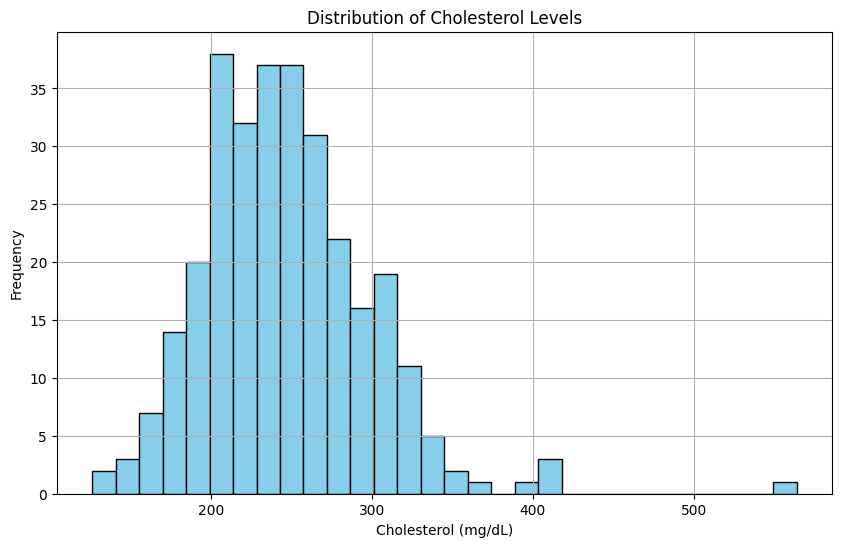

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['chol'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

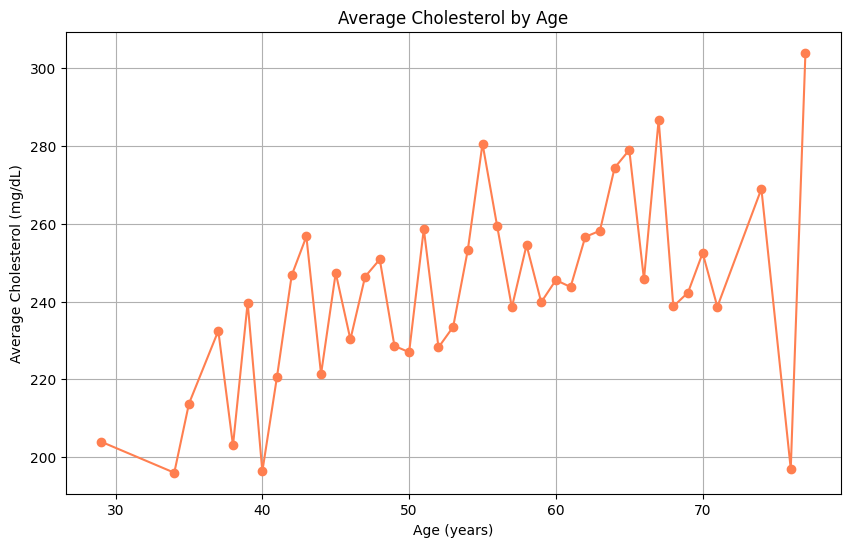

In [15]:
avg_chol_by_age = df.groupby('age')['chol'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_chol_by_age.index, avg_chol_by_age.values, marker='o', linestyle='-', color='coral')
plt.title('Average Cholesterol by Age')
plt.xlabel('Age (years)')
plt.ylabel('Average Cholesterol (mg/dL)')
plt.grid(True)
plt.show()

**Target Distribution**

In [16]:
target = df["target"].value_counts()
print(target)

target
1    164
0    138
Name: count, dtype: int64


In [17]:
sick = (target[0]/df["target"].count()*100).round(2)
hearty = (target[1]/df["target"].count()*100).round(2)

print("Percentage of patience without heart problems:",hearty)
print()
print("Percentage of patience with heart problems:", sick)

Percentage of patience without heart problems: 54.3

Percentage of patience with heart problems: 45.7


In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Text(0, 0.5, 'Num of patient')

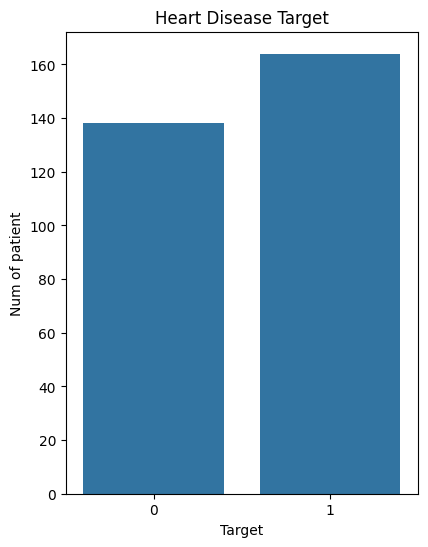

In [19]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
sns.countplot(x = "target", data = df)
plt.title("Heart Disease Target")
plt.xlabel("Target")
plt.ylabel("Num of patient")

In [20]:
df["sex"].unique()


array([1, 0])

1 = Male Patient

0 = Female Patient

In [21]:
sex = df["sex"].value_counts()
print(sex)

sex
1    206
0     96
Name: count, dtype: int64


In [22]:
# Count the number of male and female patients
sex_counts = df["sex"].value_counts()

# Calculate percentages
male = (sex_counts[1] / df["sex"].count() * 100).round(2)
female = (sex_counts[0] / df["sex"].count() * 100).round(2)

# Print results
print("Percentage of female patients:", female)
print()
print("Percentage of male patients:", male)

Percentage of female patients: 31.79

Percentage of male patients: 68.21


In [23]:
# Count the number of male and female patients
sex_counts = df["sex"].value_counts()

# Calculate percentages
male = (sex_counts[1] / df["sex"].count() * 100).round(2)
female = (sex_counts[0] / df["sex"].count() * 100).round(2)

# Print results
print("Percentage of female patients:", female)
print()
print("Percentage of male patients:", male)

Percentage of female patients: 31.79

Percentage of male patients: 68.21


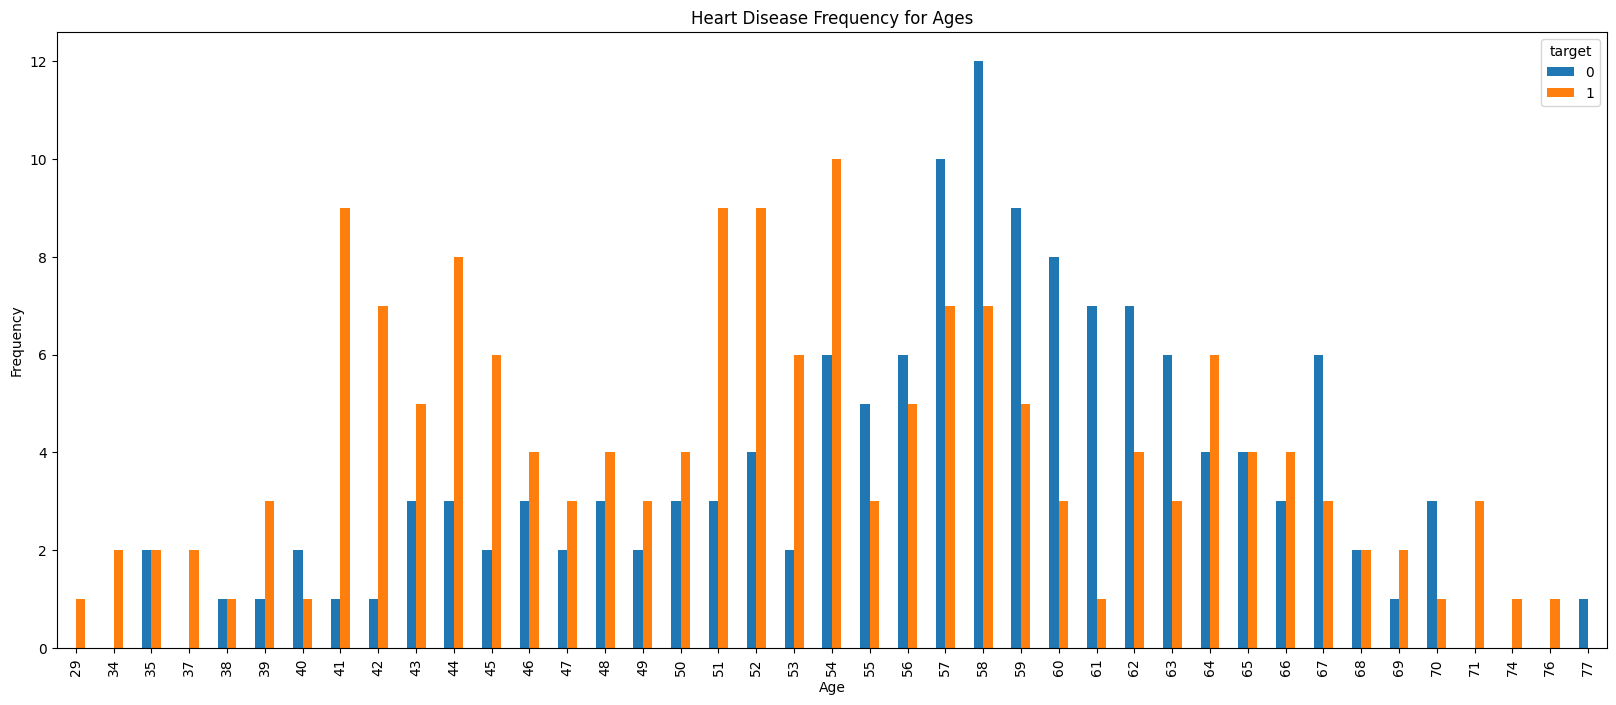

In [24]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,8))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Correlation: Heatmap**

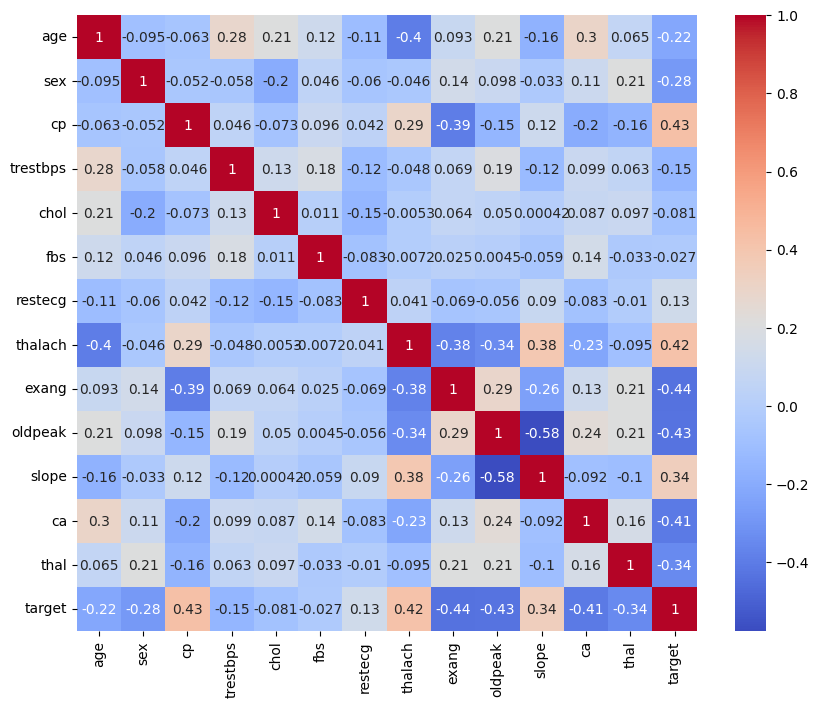

In [25]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True,cmap='coolwarm')
plt.show()

In [26]:
corr = df.corr(numeric_only=True)["target"].sort_values()
print(corr)

exang      -0.435601
oldpeak    -0.429146
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
slope       0.343940
thalach     0.419955
cp          0.432080
target      1.000000
Name: target, dtype: float64


## Model Training & Evaluation

**Split dataset into features (x) and target (y)**

In [27]:
from sklearn.model_selection import train_test_split

# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [28]:
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [29]:
df_train.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
1,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
2,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
3,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
4,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Let's define y:

In [30]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

Let's drop the target variable from our dataframes:

In [31]:
del df_train["target"]
del df_val["target"]
del df_test["target"]

Now we are ready to train a model.

## Logistic Regression Model

In [32]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr.fit(df_train_scaled,y_train)
y_pred_lr = lr.predict(df_test_scaled)
y_proba_lr = lr.predict_proba(df_test_scaled)[:,1]

In [34]:
#Model Performance Metrics

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [35]:
precision_lr = precision_score(y_test,y_pred_lr)
recall_lr = recall_score(y_test,y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)
roc_auc_lr = roc_auc_score(y_test,y_proba_lr)

In [36]:
print("Precision_score :",round(precision_lr,2))
print("Recall_score :", round(recall_lr,2))
print("F1_score :",round(f1_lr,2))
print("Roc_auc_score :", round(roc_auc_lr,2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Precision_score : 0.82
Recall_score : 0.77
F1_score : 0.79
Roc_auc_score : 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        26
           1       0.82      0.77      0.79        35

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [37]:
com_lr = confusion_matrix(y_test,y_pred_lr)
print("Confusion Matrix:\n", com_lr)

Confusion Matrix:
 [[20  6]
 [ 8 27]]


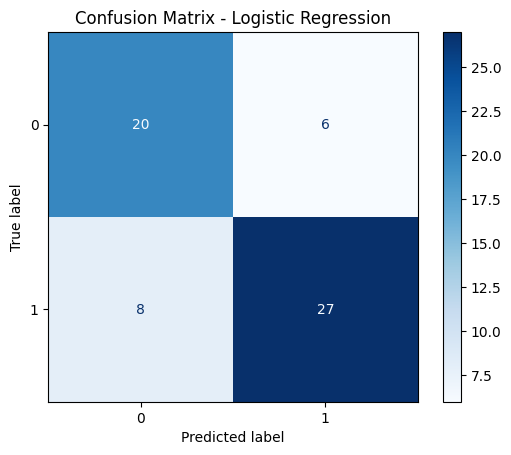

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=com_lr, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap = True, max_depth= 5, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 300)
rf.fit(df_train_scaled, y_train)
y_pred_rf = rf.predict(df_test_scaled)
y_probs_rf = rf.predict_proba(df_test_scaled)[:, 1]

In [40]:
# model evaluation

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

precision_rfc = precision_score(y_test,y_pred_rf)
recall_rfc = recall_score(y_test,y_pred_rf)
f1_rfc = f1_score(y_test,y_pred_rf)
roc_auc_rfc = roc_auc_score(y_test,y_probs_rf)

In [41]:
print("Precision Score :",round(precision_rfc,2))
print("Recall Score :",round(recall_rfc,2))
print("F1 Score :",round(f1_rfc,2))
print("Roc Auc Score :",round(roc_auc_rfc,2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Precision Score : 0.8
Recall Score : 0.8
F1 Score : 0.8
Roc Auc Score : 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.80      0.80      0.80        35

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



## XGBoost 

In [43]:
from xgboost import XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 42, colsample_bytree= 0.7, gamma = 0.2, learning_rate = 0.01, max_depth= 7, n_estimators= 200, subsample = 0.7)
xgb.fit(df_train_scaled, y_train)
y_pred_xgb = xgb.predict(df_test_scaled)
y_proba_xgb = xgb.predict_proba(df_test_scaled)[:, 1]

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb = recall_score(y_test,y_pred_xgb)
f1_xgb = f1_score(y_test,y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test,y_proba_xgb)

In [45]:
print("Precision Score :",round(precision_xgb,2))
print("Recall Score :",round(recall_xgb,2))
print("F1 Score :",round(f1_xgb,2))
print("Roc Auc Score :",round(roc_auc_xgb,2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Precision Score : 0.78
Recall Score : 0.83
F1 Score : 0.81
Roc Auc Score : 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.78      0.83      0.81        35

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



## SVM

In [47]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create pipeline: scale features then apply SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, C=1.0, gamma='scale'))

# Fit the model
svm_model.fit(df_train_scaled, y_train)

# Predict class labels
y_pred_svm = svm_model.predict(df_test_scaled)

# Predict probabilities
y_probs_svm = svm_model.predict_proba(df_test_scaled)[:, 1]

In [48]:
# SVM performance metrics
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_probs_svm)

In [49]:
print("Precision Score :",round(precision_svm,2))
print("Recall Score :",round(recall_svm,2))
print("F1 Score :",round(f1_svm,2))
print("Roc Auc Score :",round(roc_auc_svm,2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Precision Score : 0.78
Recall Score : 0.83
F1 Score : 0.81
Roc Auc Score : 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.78      0.83      0.81        35

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model with optional hyperparameters
dtc = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=4)

# Fit the model
dtc.fit(df_train_scaled, y_train)

# Predict class labels
y_pred_dtc = dtc.predict(df_test_scaled)

# Predict probabilities (for ROC AUC)
y_probs_dtc = dtc.predict_proba(df_test_scaled)[:, 1]

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

precision_dtc = precision_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc)
f1_dtc = f1_score(y_test, y_pred_dtc)
roc_auc_dtc = roc_auc_score(y_test, y_probs_dtc)

In [53]:
print("Precision Score :",round(precision_dtc,2))
print("Recall Score :",round(recall_dtc,2))
print("F1 Score :",round(f1_dtc,2))
print("Roc Auc Score :",round(roc_auc_dtc,2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dtc))

Precision Score : 0.83
Recall Score : 0.69
F1 Score : 0.75
Roc Auc Score : 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.81      0.72        26
           1       0.83      0.69      0.75        35

    accuracy                           0.74        61
   macro avg       0.74      0.75      0.74        61
weighted avg       0.75      0.74      0.74        61



In [54]:
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Decision Tree']
precision = [0.82, 0.80, 0.78, 0.78, 0.83]
recall = [0.77, 0.80, 0.83, 0.83, 0.69]
f1 = [0.79, 0.80, 0.81, 0.81, 0.75]
roc_auc = [0.85, 0.89, 0.87, 0.84, 0.80]

In [55]:
metrics_df = pd.DataFrame({
    'Model': models,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
})

In [56]:
metrics_df.index = range(1, len(metrics_df) + 1)

In [57]:
metrics_df

,Model,Precision,Recall,F1 Score,ROC-AUC
1,Logistic Regression,0.82,0.77,0.79,0.85
2,Random Forest,0.80,0.80,0.80,0.89
3,XGBoost,0.78,0.83,0.81,0.87
4,SVM,0.78,0.83,0.81,0.84
5,Decision Tree,0.83,0.69,0.75,0.80


Save the model

In [58]:
import pickle

In [60]:
# Save the model to a file
with open('heart_model.pkl', 'wb') as file:
    pickle.dump(lr, file)


load the model

In [63]:
with open('heart_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
lr
# Use it for predictions
# predictions = loaded_model.predict(X_test)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [64]:
patient_record_df = df.iloc[[9]]  

In [65]:
print(patient_record_df)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
9   2     2       0  


In [66]:
patient = {
    'age': 54,
    'sex': '1',
    'cp': 0,
    'trestbps': 122,
    'chol': 286,
    'fbs': 0,
    'restecg': 0,
    'thalach': 116,
    'exang': 1,
    'oldpeak': 3.2,
    'slope': 1,
    'ca': 2,
    'thal': 2,
    'target': 0
}

In [68]:
from sklearn.feature_extraction import DictVectorizer


In [73]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
 
    return dv, model


In [76]:
from sklearn.feature_extraction import DictVectorizer

# Create and fit the DictVectorizer
dv = DictVectorizer(sparse=False)
dicts = df.drop('target', axis=1).to_dict(orient='records')  # assuming 'target' is your label
X = dv.fit_transform(dicts)  # Fit and transform training data

# Now you can transform a new patient's record
patient = dicts[9]  # 10th patient
X_patient = dv.transform([patient])

In [77]:
X_patient

array([[ 54. ,   2. , 286. ,   0. ,   1. ,   0. ,   3.2,   0. ,   1. ,
          1. ,   2. , 116. , 122. ]])

In [79]:
lr.predict_proba(X)

array([[9.99999753e-01, 2.46521558e-07],
       [9.99999999e-01, 1.02873705e-09],
       [1.00000000e+00, 1.62174857e-11],
       [1.00000000e+00, 1.41810254e-14],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.44986964e-12],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.92774231e-15],
       [0.00000000e+00, 1.00000000e+00],
       [9.99996377e-01, 3.62272593e-06],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [3.51541019e-12, 1.00000000e+00],
       [1.00000000e+00, 1.29450008e-10],
       [1.00000000e+00, 1.17404144e-17],
       [6.21724894e-15, 1.00000000e+00],
       [2.93050644e-06, 9.99997069e-01],
       [1.33956845e-07, 9.99999866e-01],
       [9.99999992e-01, 8.17393545e-09],
       [0.000000

In [80]:
lr.predict_proba(X)[0,1]

np.float64(2.4652155843404933e-07)